In [169]:
import numpy as np
import pandas as pd
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices, dmatrix
import time
# from imblearn.over_sampling import SMOTE
from collections import Counter
# import tensorflow as tf
import re

os.getcwd() 
os.chdir("/Users/macbook/Downloads/lending-club")
accepted = pd.read_csv('accepted_2007_to_2018Q4.csv')
df=accepted.copy()

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


/Users/macbook/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.loan_amnt.isnull().sum()
df = df.dropna(axis=0, subset=['loan_amnt'])

Text(0.5, 1.0, 'Total committed by Investors')

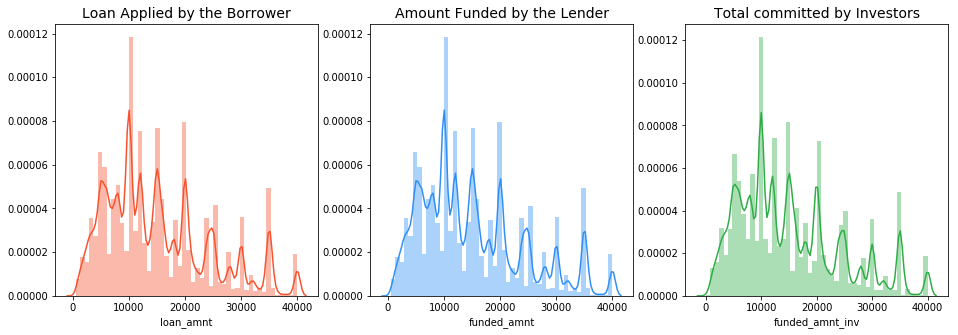

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

loan_amount = df["loan_amnt"]
funded_amount = df["funded_amnt"]
investor_funds = df["funded_amnt_inv"]


sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

In [4]:
# drop the loans with status = current 
df = df[df.loan_status != 'Current']

In [5]:
# Total amount of money funded by LC from 2007-2018

tot_loan_amnt = df.loan_amnt.sum(axis = 0, skipna = True)
tot_funded_amnt = df.funded_amnt.sum(axis = 0, skipna = True)
tot_funded_amnt_inv = df.funded_amnt_inv.sum(axis = 0, skipna = True)

LC_funded_amnt = tot_funded_amnt - tot_funded_amnt_inv
LC_funded_amnt # $37,446,588.72 = funded by Lending Club itself

37446588.72096634

In [6]:
# Overall return of investment if EVERY note [exclude 'current'] is invested

tot_pymnt = df.total_pymnt.sum(axis = 0, skipna = True)
ROI = ((tot_pymnt - tot_funded_amnt)/(tot_funded_amnt))*100

ROI

1.4445241788286827

In [116]:
df['ROI'] = ((df.total_pymnt - df.funded_amnt)/(df.funded_amnt))*100
df['ROI_m'] = ((df.total_pymnt - df.funded_amnt)/(df.funded_amnt))
df.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,ROI,ROI_m
1443472,142628395,NaN,8000.0,8000.0,7750.0,36 months,11.06,262.14,B,B3,teacher,3 years,RENT,72000.0,Not Verified,Oct-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,956xx,CA,14.43,0.0,Dec-2005,660.0,664.0,1.0,NaN,20.0,7.0,1.0,2485.0,25.1,43.0,f,7235.89,7009.77,1053.48,1020.56,764.11,289.37,0.0,0.0,0.0,Feb-2019,262.14,Apr-2019,Mar-2019,674.0,670.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,54018.0,1.0,3.0,1.0,2.0,7.0,51533.0,64.0,3.0,4.0,1099.0,52.0,9900.0,3.0,7.0,6.0,6.0,7717.0,6787.0,14.1,0.0,0.0,142.0,154.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,0.0,2.0,3.0,3.0,10.0,26.0,4.0,15.0,3.0,7.0,0.0,0.0,0.0,4.0,100.0,0.0,1.0,0.0,71193.0,54018.0,7900.0,61293.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,-86.831500,-0.868315
1378489,144613266,NaN,30000.0,30000.0,30000.0,60 months,17.97,761.32,D,D1,NaN,< 1 year,MORTGAGE,150000.0,Verified,Dec-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,926xx,CA,24.07,1.0,Jul-1988,690.0,694.0,1.0,21.0,NaN,19.0,0.0,116534.0,59.3,26.0,w,29049.70,29049.70,2194.11,2194.11,950.30,1243.81,0.0,0.0,0.0,Mar-2019,761.32,Apr-2019,Mar-2019,679.0,675.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,687318.0,0.0,1.0,0.0,1.0,15.0,46126.0,NaN,0.0,2.0,13208.0,64.0,159200.0,1.0,2.0,1.0,3.0,36175.0,27166.0,66.7,0.0,0.0,145.0,365.0,13.0,13.0,3.0,13.0,21.0,5.0,21.0,0.0,8.0,10.0,10.0,11.0,4.0,16.0,18.0,10.0,19.0,0.0,0.0,0.0,0.0,96.2,60.0,0.0,

In [8]:
# Average ROI per year 

dt_series = pd.to_datetime(df['issue_d'])
df['year'] = dt_series.dt.year

df.groupby(['year'], as_index=False).ROI.mean()

,year,ROI
0,2007,1.093752
1,2008,3.970555
2,2009,8.386050
3,2010,10.485573
4,2011,10.711353
5,2012,11.011883
6,2013,13.248693
7,2014,9.203847
8,2015,4.372412
9,2016,-0.947520


Text(0, 0.5, 'Average loan amount issued')

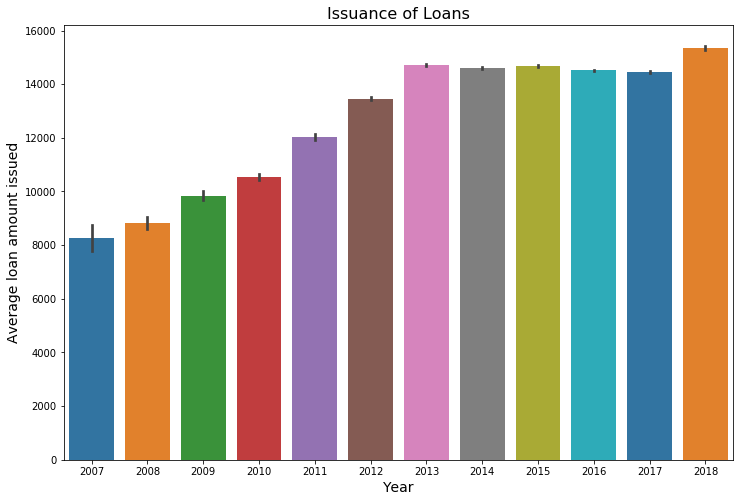

In [9]:
# Average loan amount issued per year

plt.figure(figsize=(12,8))
sns.barplot('year', 'loan_amnt', data=df, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

# majority of the loans were issued after 2015

In [31]:
# Total loan amount issued per year 
df.groupby(['year'], as_index=True).loan_amnt.sum()

year
2007    4.977475e+06
2008    2.111925e+07
2009    5.192825e+07
2010    1.319926e+08
2011    2.616838e+08
2012    7.184110e+08
2013    1.982662e+09
2014    3.265448e+09
2015    5.543538e+09
2016    4.358178e+09
2017    2.628044e+09
2018    1.045288e+09
Name: loan_amnt, dtype: float64

In [32]:
# Total loan amount funded by investors per year 
df.groupby(['year'], as_index=True).funded_amnt_inv.sum()


year
2007    7.993848e+05
2008    7.614383e+06
2009    4.577788e+07
2010    1.230846e+08
2011    2.540260e+08
2012    7.167061e+08
2013    1.981635e+09
2014    3.264368e+09
2015    5.541335e+09
2016    4.356253e+09
2017    2.627282e+09
2018    1.045064e+09
Name: funded_amnt_inv, dtype: float64

In [34]:
# Total loan amount funded by Lending Club itself per year 
df['loan_amnt_LC'] = df.funded_amnt - df.funded_amnt_inv
df.groupby(['year'], as_index=True).loan_amnt_LC.sum()

year
2007    3.992165e+06
2008    1.236064e+07
2009    6.036872e+06
2010    3.266547e+06
2011    3.337627e+06
2012    1.236496e+06
2013    1.021712e+06
2014    1.080400e+06
2015    2.202575e+06
2016    1.925553e+06
2017    7.623500e+05
2018    2.236503e+05
Name: loan_amnt_LC, dtype: float64

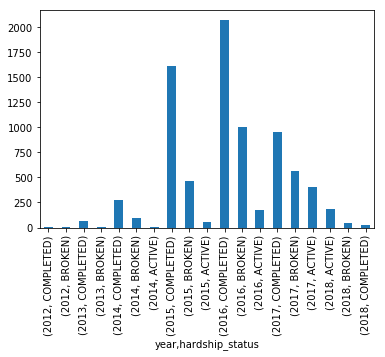

In [13]:
df.groupby('year')['hardship_status'].value_counts().plot.bar()

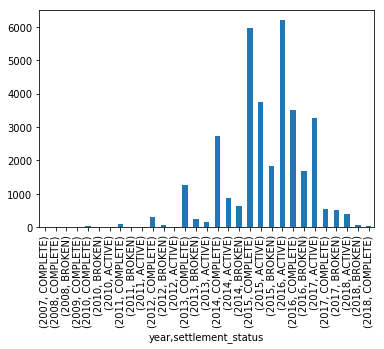

In [14]:
df.groupby('year')['settlement_status'].value_counts().plot.bar()

In [15]:
df['loan_status'].value_counts()

Fully Paid                                             1076751
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [16]:
df.groupby(['year']).loan_status.value_counts()

year  loan_status                                        
2007  Does not meet the credit policy. Status:Fully Paid        239
      Fully Paid                                                206
      Does not meet the credit policy. Status:Charged Off       113
      Charged Off                                                45
2008  Fully Paid                                               1315
      Does not meet the credit policy. Status:Fully Paid        582
      Does not meet the credit policy. Status:Charged Off       249
      Charged Off                                               247
2009  Fully Paid                                               4122
      Charged Off                                               594
      Does not meet the credit policy. Status:Fully Paid        436
      Does not meet the credit policy. Status:Charged Off       129
2010  Fully Paid                                              10049
      Charged Off                                         

[Text(0, 0.5, '(%)')]

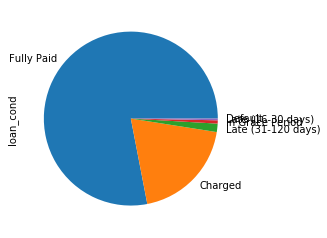

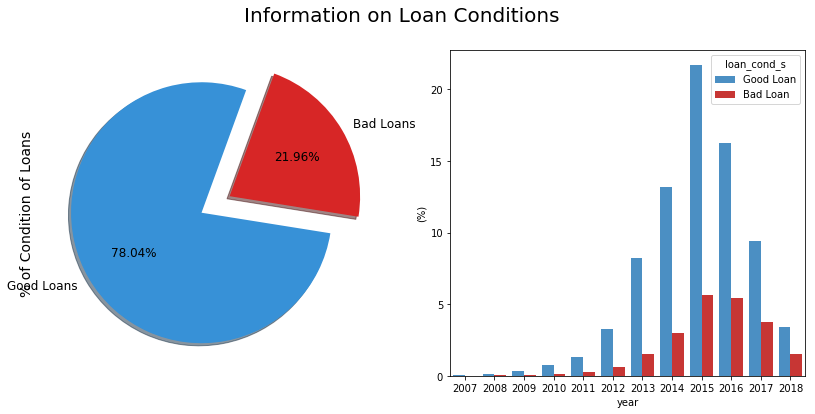

In [20]:
# Besides current loans and all the loans that are fully paid, consider the remaining type as bad loans

Paid = ['Fully Paid','Does not meet the credit policy. Status:Fully Paid']
Charged_off = ['Charged Off','Does not meet the credit policy. Status:Charged Off']

df['loan_cond'] = np.nan

def loan_condition(status):
    if status in Paid:
        return 'Fully Paid'
    elif status in Charged_off:
        return 'Charged'
    else:
        return status

df['loan_cond'] = df['loan_status'].apply(loan_condition)
df["loan_cond"].value_counts().plot.pie()

bad_loan = ['Charged Off','Default','Does not meet the credit policy. Status:Charged Off','In Grace Period', 'Late (16-30 days)','Late (31-120 days)']

df['loan_cond_s'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
df['loan_cond_s'] = df['loan_status'].apply(loan_condition) 

f, ax = plt.subplots(1,2, figsize=(14,6))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

df["loan_cond_s"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)

ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

palette = ["#3791D7", "#E01E1B"]
sns.barplot(x="year", y="loan_amnt", hue="loan_cond_s", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")

In [33]:
# Total case of loan accepted per year 

df['loan_cond'].groupby(df.year).agg('count')

year
2007       603
2008      2393
2009      5281
2010     12537
2011     21721
2012     53367
2013    134808
2014    223710
2015    377796
2016    300346
2017    181728
2018     68061
Name: loan_cond, dtype: int64

In [103]:
# Observe loans accepted by states

# Grouping by our metrics
# First Plotly Graph (We evaluate the operative side of the business)
by_loan_amnt = df.groupby(['addr_state'], as_index=False).loan_amnt.sum()
by_int_rate = df.groupby(['addr_state'], as_index=False).int_rate.mean()
by_inc = df.groupby(['addr_state'], as_index=False).annual_inc.mean()

# Take the values to a list for visualization purposes.
states = by_loan_amnt['addr_state'].values.tolist()
avg_loan_amnt = by_loan_amnt['loan_amnt'].values.tolist()
avg_int_rate = by_int_rate['int_rate'].values.tolist()
avg_annual_inc = by_inc['annual_inc'].values.tolist()


from collections import OrderedDict

# Figure Number 1 (Perspective for the Business Operations)
metrics_data = OrderedDict([('state_codes', states),
                            ('issued_loans', avg_loan_amnt),
                            ('int_rate', avg_int_rate),
                            ('annual_inc', avg_annual_inc)])
                     
metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df.sort_values(by=['issued_loans'], ascending=False).head(5)

,state_codes,issued_loans,int_rate,annual_inc
4,CA,2.970322e+09,13.21,82099.73
43,TX,1.725122e+09,13.21,81378.30
34,NY,1.629755e+09,13.44,79466.42
9,FL,1.361882e+09,13.38,71418.34
14,IL,7.836776e+08,13.13,78060.44


In [104]:
ok_list = ['emp_title','emp_length']
for col in ok_list:
    new_list = []
    col_values = list(df[col])
    for i, val in enumerate(col_values):
        if type(val) != str:
            if np.isnan(val):
                new_list.append('none')
            else:
                new_list.append(val)
        else:
            new_list.append(val)
    new_col_name = col + '_2'
    df[new_col_name] = new_list
    
emp_length_int = []
for i in df['emp_length_2']:
    if i == 'none':
        emp_length_int.append(0)
    else:
        emp_length_int.append(int(re.findall(r'\d+', i)[0]))
df['emp_length_int'] = emp_length_int

df["loan_cond"] = df["loan_cond"].astype('category')
df['loan_cond_int'] = df["loan_cond"].cat.codes

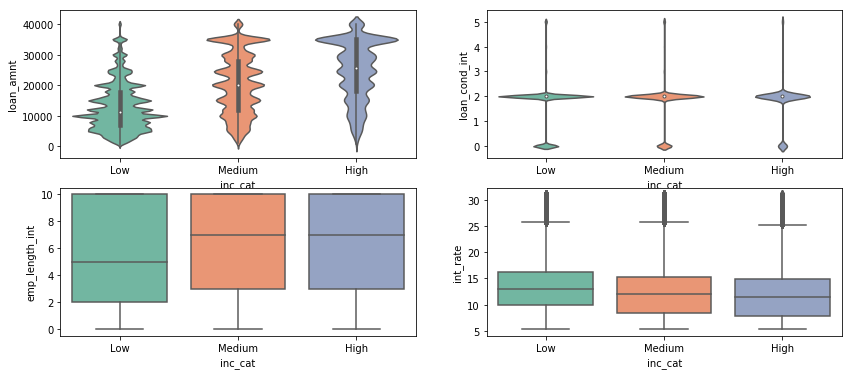

In [105]:
# Let's create categories for annual_income since most of the bad loans are located below 100k

df['inc_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['annual_inc'] <= 100000, 'inc_cat'] = 'Low'
    col.loc[(col['annual_inc'] > 100000) & (col['annual_inc'] <= 200000), 'inc_cat'] = 'Medium'
    col.loc[col['annual_inc'] > 200000, 'inc_cat'] = 'High'
    
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,6))

sns.violinplot(x="inc_cat", y="loan_amnt", data=df, palette="Set2", ax=ax1 )
sns.violinplot(x="inc_cat", y="loan_cond_int", data=df, palette="Set2", ax=ax2)
sns.boxplot(x="inc_cat", y="emp_length_int", data=df, palette="Set2", ax=ax3)
sns.boxplot(x="inc_cat", y="int_rate", data=df, palette="Set2", ax=ax4)

In [106]:
# observing default ratio by states

by_cond = df.groupby('addr_state')['loan_cond_s'].value_counts()/ df.groupby('addr_state')['loan_cond_s'].count()
by_emp_length = df.groupby(['addr_state'], as_index=False).emp_length_int.mean().sort_values(by="addr_state")

loan_cond_bystate = pd.crosstab(df['addr_state'], df['loan_cond_s'] )

cross_cond = pd.crosstab(df["addr_state"], df["loan_cond_s"])

# Percentage of condition of loan
percent_loan_cont = pd.crosstab(df['addr_state'], df['loan_cond_s']).apply(lambda x: x/x.sum() * 100)
cond_ratio = cross_cond["Bad Loan"]/cross_cond["Good Loan"]
by_dti = df.groupby(['addr_state'], as_index=False).dti.mean()
state_codes = sorted(states)

default_ratio = cond_ratio.values.tolist()
avg_dti = by_dti['dti'].values.tolist()
avg_emp_length = by_emp_length["emp_length_int"].values.tolist()
num_badloans = loan_cond_bystate['Bad Loan'].values.tolist()
percent_all_badloans = percent_loan_cont['Bad Loan'].values.tolist()

risk_data = OrderedDict([('state_codes', state_codes),
                         ('default_ratio', default_ratio),
                         ('badloans_amount', num_badloans),
                         ('percentage_of_badloans', percent_all_badloans),
                         ('average_dti', avg_dti),
                         ('average_emp_length', avg_emp_length)])

risk_df = pd.DataFrame.from_dict(risk_data)
risk_df = risk_df.round(decimals=3)
risk_df.sort_values(by=['default_ratio'], ascending=False).head(10)

,state_codes,default_ratio,badloans_amount,percentage_of_badloans,average_dti,average_emp_length
25,MS,0.414,2017,0.664,20.663,5.955
29,NE,0.386,1038,0.342,20.181,5.452
2,AR,0.355,2709,0.892,20.233,5.786
1,AL,0.347,4406,1.451,20.169,6.040
36,OK,0.341,3214,1.059,19.935,5.661
18,LA,0.339,4047,1.333,19.398,5.721
34,NY,0.321,27558,9.077,16.573,5.702
20,MD,0.314,7720,2.543,17.790,5.896
9,FL,0.311,23399,7.707,18.530,5.383
33,NV,0.309,4891,1.611,18.552,5.489


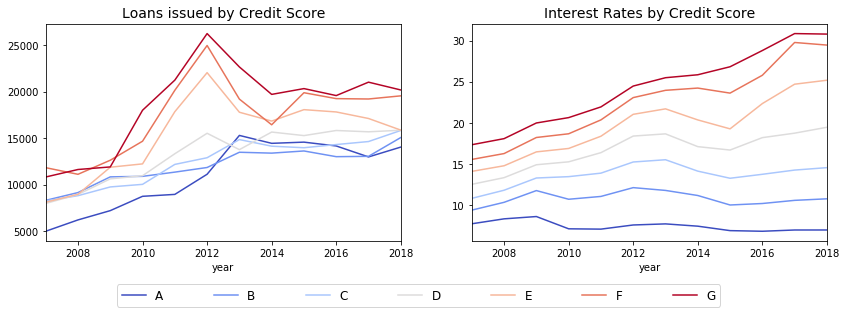

In [107]:
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)
    
    
by_inc = df.groupby(['year', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

Text(0, 0.5, 'Interest Rate (%)')

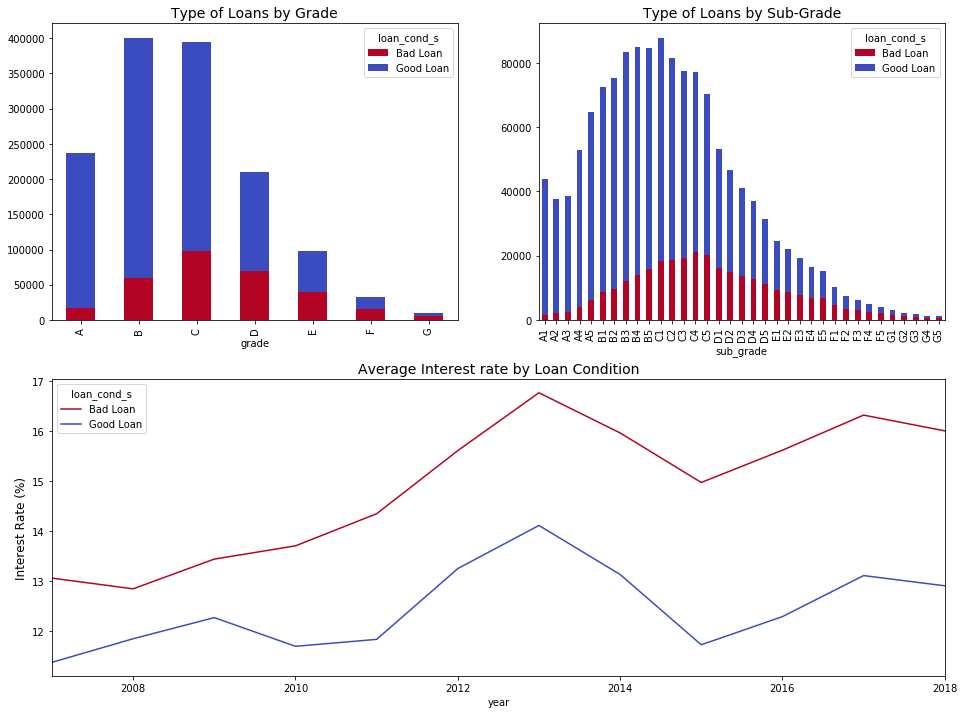

In [108]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

loans_by_grade = df.groupby(['grade', 'loan_cond_s']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)


loans_by_sub_grade = df.groupby(['sub_grade', 'loan_cond_s']).size()
loans_by_sub_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

by_interest = df.groupby(['year', 'loan_cond_s']).int_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Average Interest rate by Loan Condition', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)

Monte Carlo Simulation 

In [254]:
import random
from collections import Counter
from sklearn import preprocessing

df['ROI'] = ((df.total_pymnt - df.funded_amnt)/(df.funded_amnt))*100
df['ROI_m'] = ((df.total_pymnt - df.funded_amnt)/(df.funded_amnt)).round(2)

num_reps = 150
num_simulations = 500

# df['ROI_m'].sample(100).plot.hist()

port_ROI = pd.DataFrame([])

# # Loop through many simulations
for i in range(num_simulations):
    sample_ROI = df['ROI_m'].sample(num_reps)
    sample_ROI = pd.DataFrame(sample_ROI)
    port_ROI = port_ROI.append(sample_ROI)

/Users/macbook/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


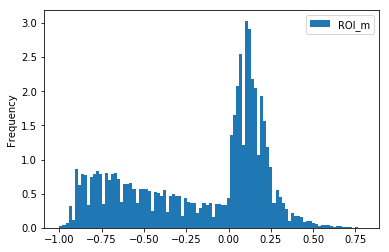

In [243]:
port_ROI.plot.hist(bins = 100, normed = True)
# area = sum(np.diff(bins)*values)

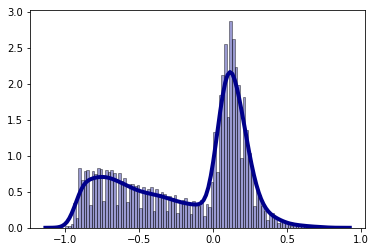

In [255]:
sns.distplot(port_ROI, hist=True, kde=True, 
             bins= 100, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [256]:
port_ROI.describe()

,ROI_m
count,74999.000000
mean,-0.174222
std,0.397735
min,-1.000000
25%,-0.560000
50%,0.020000
75%,0.140000
max,0.790000


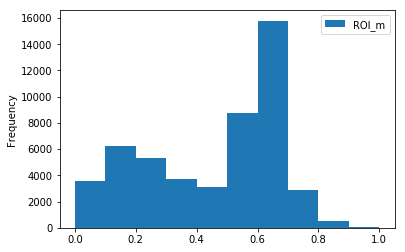

In [231]:
df_normalized.plot.hist()

In [257]:
# amount of negative ROIs in 5000 generated total ROIs
np.sum((port_ROI < 0).values.ravel())/(len(port_ROI))*100

47.053333333333335